# SMART dataset

The following script exemplifies the access and usage of SMART data measured during EUREC4A. The Spectral Modular Airborne Radiation measurement sysTem (SMART) measures downward irradiances in the solar spectral range between 300 nm and 2200 nm.

More information on the dataset can be found in {cite:t}`Stevens:2019` and {cite:t}`Wendisch:2001`. If you have questions or if you would like to use the data for a publication, please don't hesitate to get in contact with the dataset authors as stated in the dataset attributes `contact` or `author`.

## Get data
* To load the data we first load the EUREC4A meta data catalogue. More information on the catalog can be found [here](https://github.com/eurec4a/eurec4a-intake#eurec4a-intake-catalogue).

In [1]:
import eurec4a

In [2]:
cat = eurec4a.get_intake_catalog(use_ipfs="QmahMN2wgPauHYkkiTGoG2TpPBmj3p5FoYJAq9uE9iXT9N")
list(cat.HALO.SMART)

['spectral_irradiances']

* We can further specify a product and a flight and obtain the dataset using `to_dask`.

```{note}
Have a look at the attributes of the xarray dataset `ds_smart` for all relevant information on the dataset, such as author, contact, or citation infromation.
```

In [3]:
ds_smart = cat.HALO.SMART.spectral_irradiances['HALO-0205'].to_dask()
ds_smart

/usr/share/miniconda3/envs/how_to_eurec4a/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.Dataset> Size: 2MB
Dimensions:               (time: 32730)
Coordinates:
  * time                  (time) datetime64[ns] 262kB 2020-02-05T09:15:53 ......
Data variables:
    F_down_solar_wl_1238  (time) float32 131kB dask.array<chunksize=(32730,), meta=np.ndarray>
    F_down_solar_wl_1638  (time) float32 131kB dask.array<chunksize=(32730,), meta=np.ndarray>
    F_down_solar_wl_422   (time) float32 131kB dask.array<chunksize=(32730,), meta=np.ndarray>
    F_down_solar_wl_532   (time) float32 131kB dask.array<chunksize=(32730,), meta=np.ndarray>
    F_down_solar_wl_648   (time) float32 131kB dask.array<chunksize=(32730,), meta=np.ndarray>
    F_down_solar_wl_858   (time) float32 131kB dask.array<chunksize=(32730,), meta=np.ndarray>
    alt                   (time) float32 131kB dask.array<chunksize=(32730,), meta=np.ndarray>
    lat                   (time) float32 131kB dask.array<chunksize=(32730,), meta=np.ndarray>
    lon                   (time) float32 131kB dask.array<chunksize=(32730,), meta=np.ndarray>
    saa                   (time) float32 131kB dask.array<chunksize=(32730,), meta=np.ndarray>
    sza                   (time) float32 131kB dask.array<chunksize=(32730,), meta=np.ndarray>
Attributes:
    Contact:              Andre Ehrlich, University Leipzig, a.ehrlich@uni-le...
    Research_Flight_Day:  2020/20/05
    Title:                Spectral downward irradiance measured by SMART duri...
    Version:              Revision 3 from 2021/01/24
    campaign:             EUREC4A
    comment 1:            BAHAMAS data was processed by DLR, contact Andreas ...
    platform:             HALO

The available dataset includes irradiances for six selected wavelengths (422nm, 532nm, 648nm, 858nm, 1238nm, 1638nm). The full dataset is available on demand. Contact the dataset authors as stated in the dataset attributes `contact`.

First Quickplot of whole flight (one wavelength)

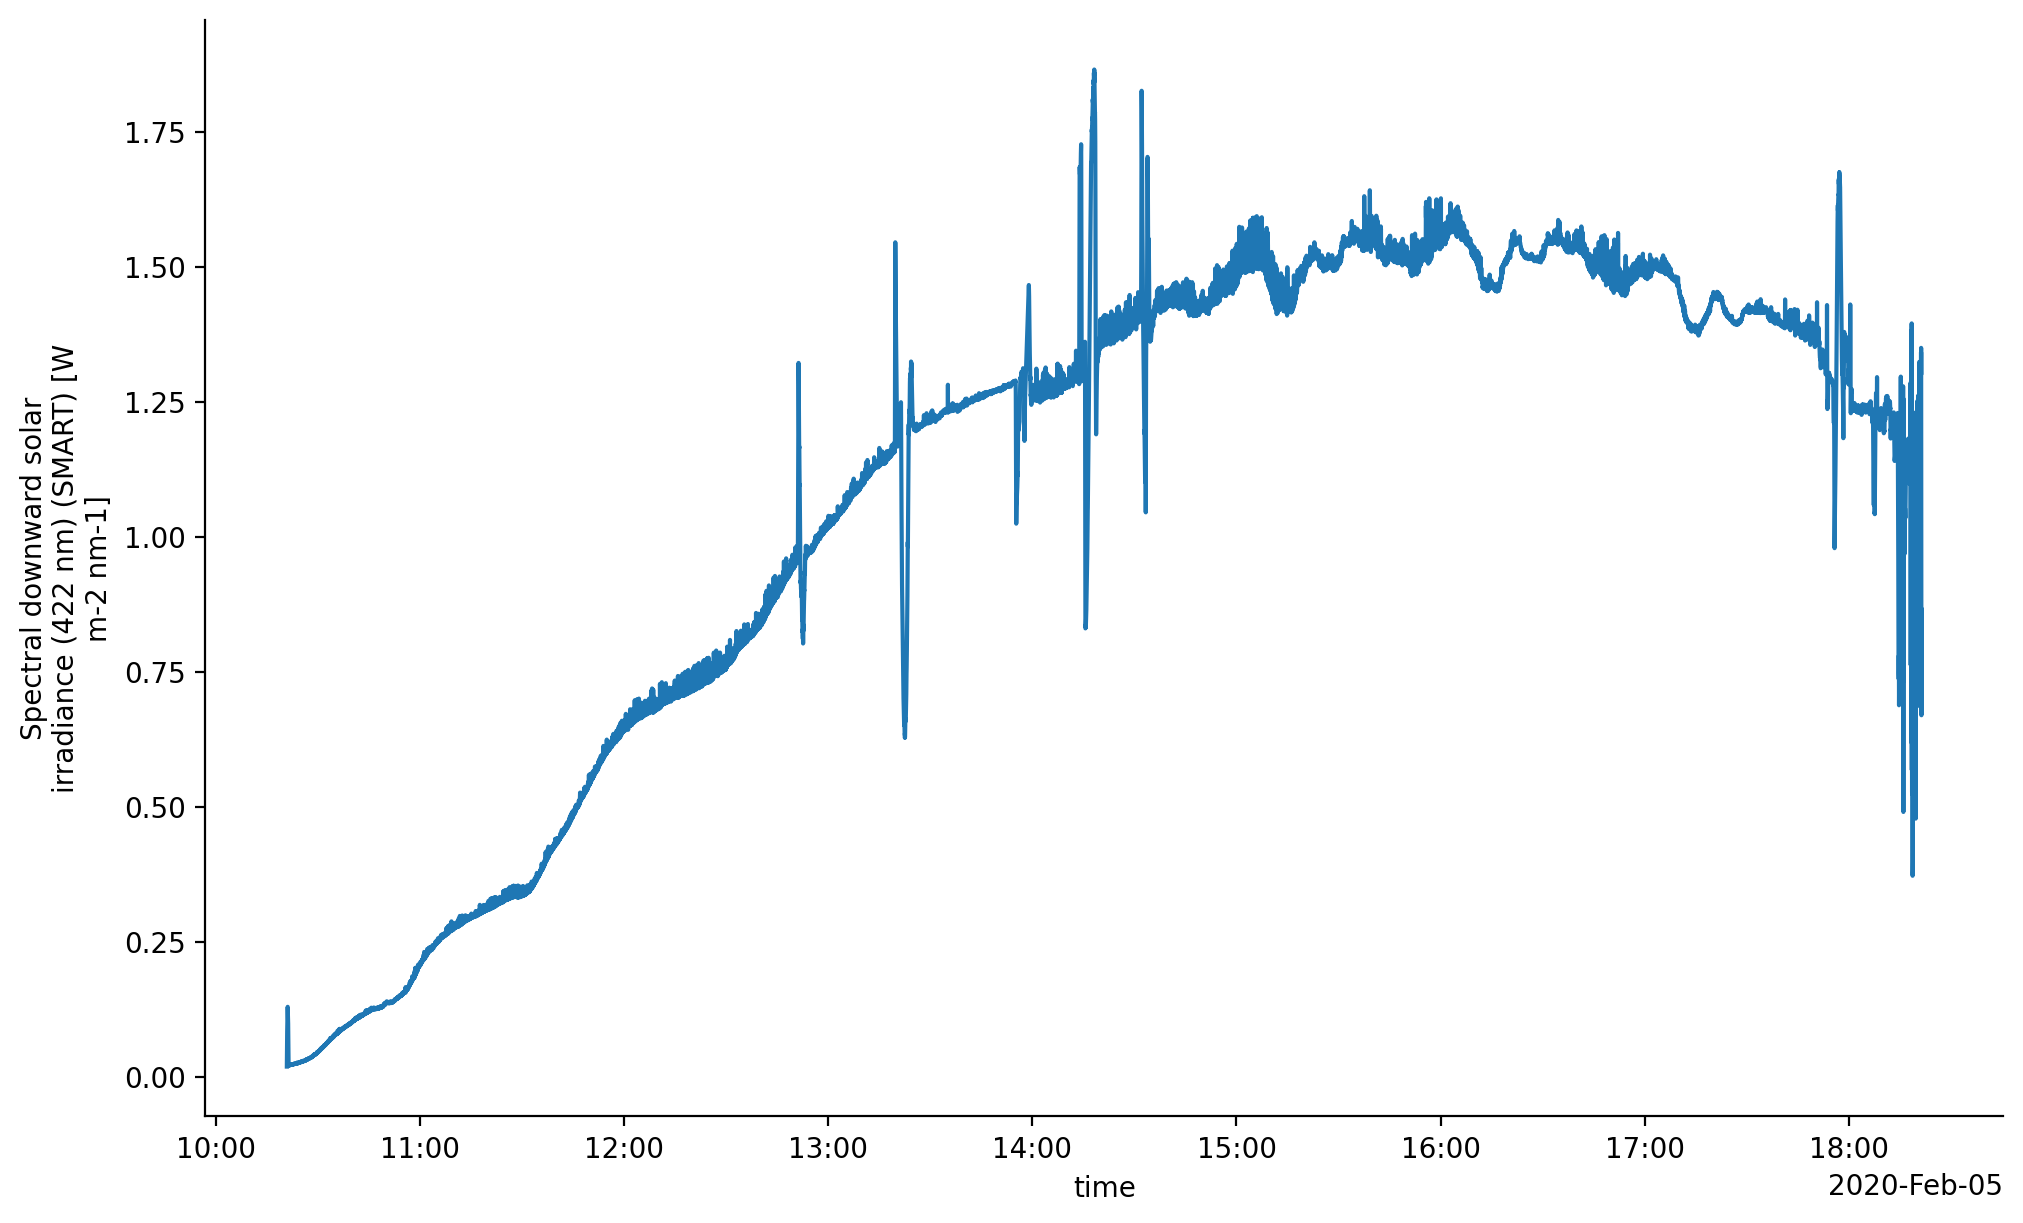

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pathlib
plt.style.use(pathlib.Path("./mplstyle/book"))

ds_smart.F_down_solar_wl_422.plot();

## Load HALO flight phase information
All HALO flights were split up into flight phases or segments to allow for a precise selection in time and space of a circle or calibration pattern. For more information have a look at the respective [github repository](https://github.com/eurec4a/halo-flight-phase-separation).

In [5]:
meta = eurec4a.get_flight_segments()

We select the flight phase we are interested in, e.g. the second circle on February 5 by it’s segment_id.

In [6]:
segments = {s["segment_id"]: {**s, "flight_id": flight["flight_id"]}
             for platform in meta.values()
             for flight in platform.values()
             for s in flight["segments"]
            }
seg = segments["HALO-0205_c2"]

We transfer the information from our flight segment selection to our radar and radiometer data in the xarray dataset.

In [7]:
ds_smart_selection = ds_smart.sel(time=slice(seg["start"], seg["end"]))

## Plots

We plot the spectral irradiances from different wavelengths measured with SMART during the selected flight segment.

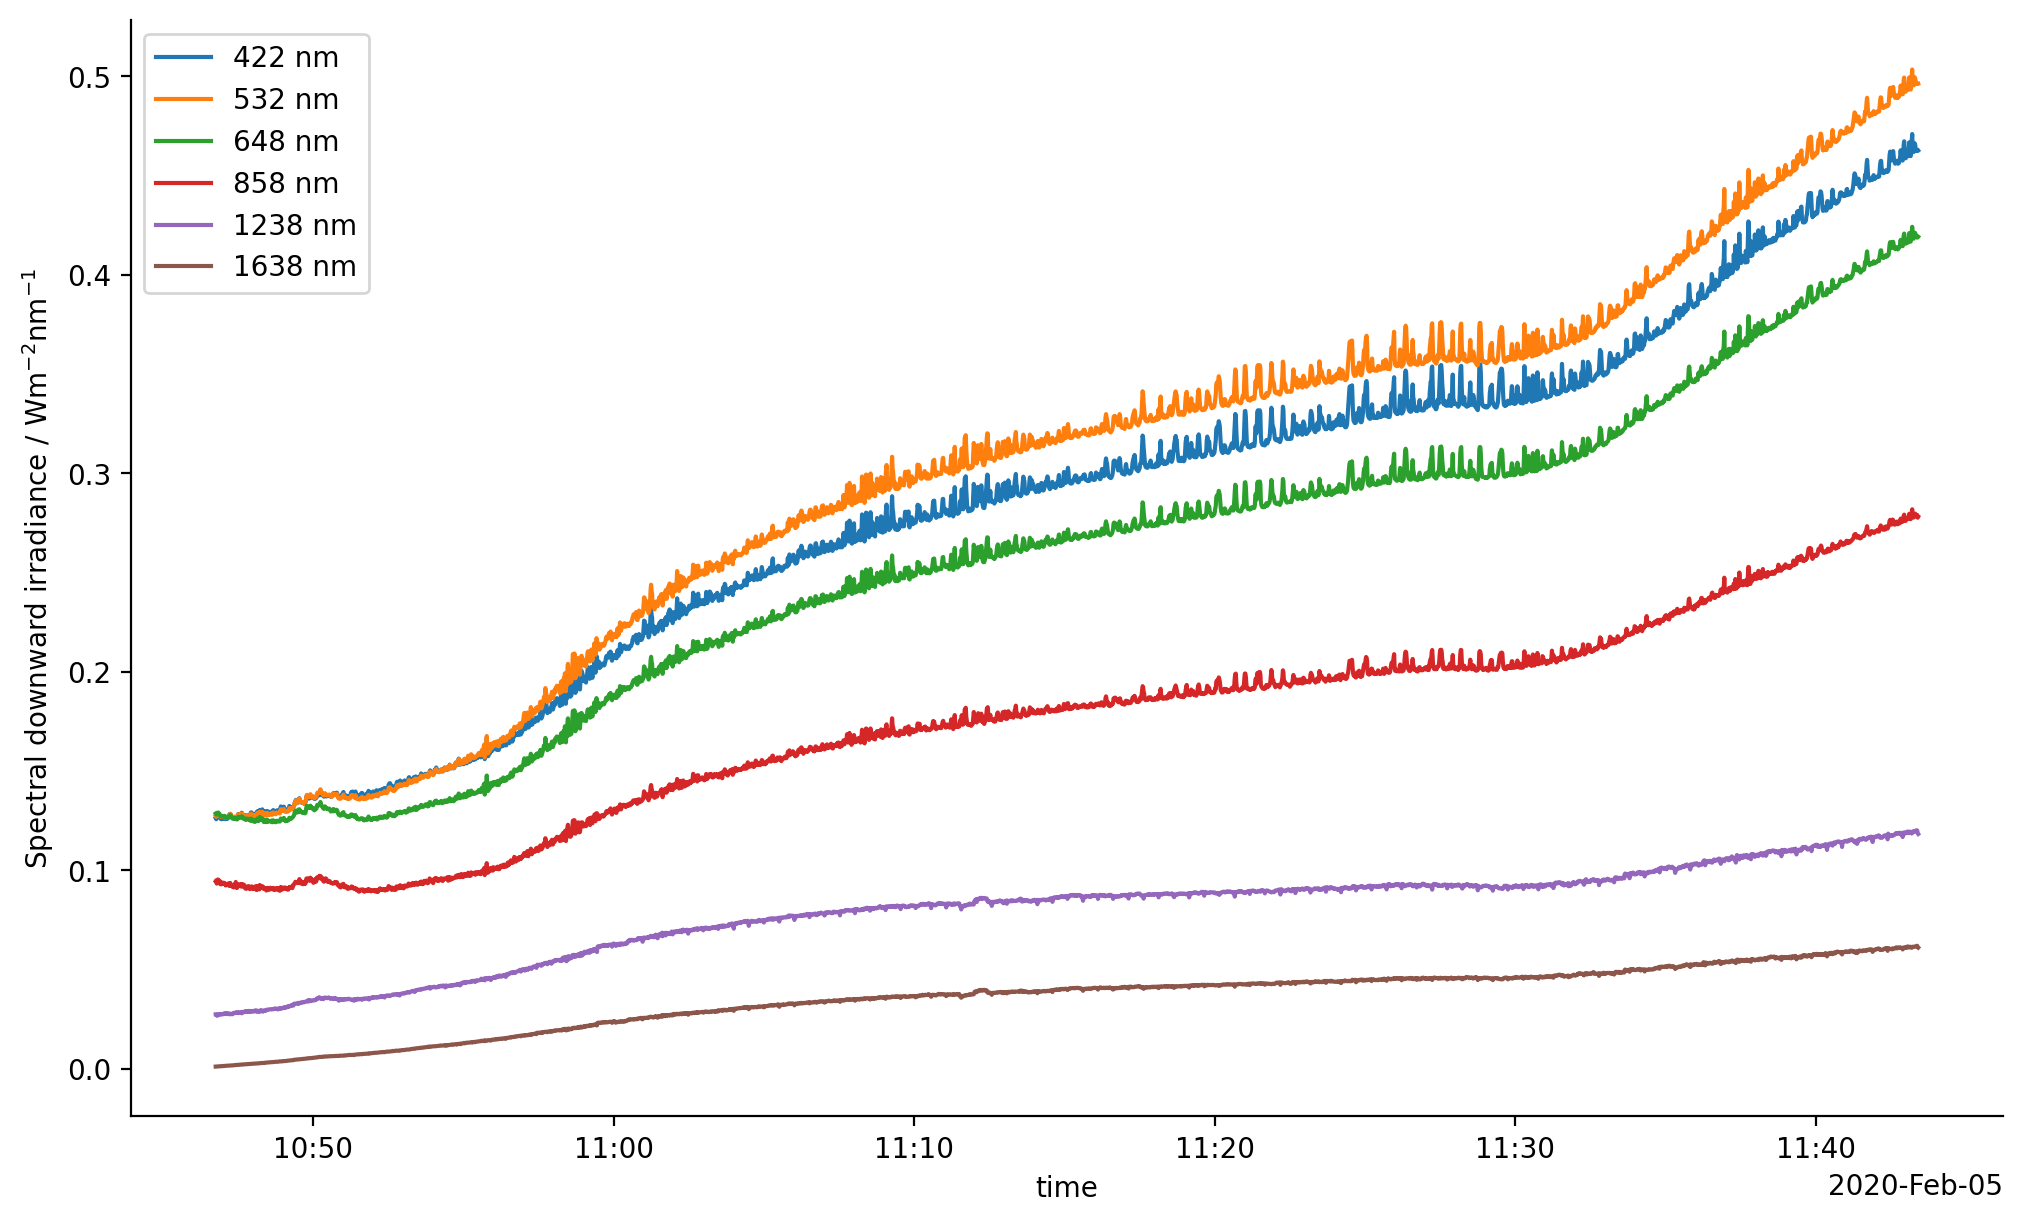

In [8]:
fig, ax = plt.subplots()
wl_list=[422,532,648,858,1238,1638]
for i in wl_list:
    ds_smart_selection[f'F_down_solar_wl_{i}'].plot(label =f'{i} nm')
ax.legend()
ax.set_ylabel('Spectral downward irradiance / Wm$^{-2}$nm$^{-1}$')
None